# Rain in Australia

![](https://i.imgur.com/N8aIuRK.jpg)

### How to run the code

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. You will be prompted to connect your Google Drive account so that this notebook can be placed into your drive for execution.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.



## Problem Statement

In this group project we are going to implement different models to answer below question. Here is the source of our dataset [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data analysts, we are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


Let's install and import some required libraries before we begin.

In [1]:
#restart the kernel after installation
#!pip install pandas-profiling numpy matplotlib seaborn --quiet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#!pip install opendatasets scikit-learn jovian --quiet --upgrade


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#!pip install opendatasets
#!pip install jovian

In [17]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline
# warnings
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [3]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


The dataset is downloaded and extracted to the folder `weather-dataset-rattle-package`.

In [4]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

The file `weatherAUS.csv` contains the data. Let's load it into a Pandas dataframe.

Date: The recorded date.

Location: The city or weather station.

MinTemp / MaxTemp: Minimum and maximum temperature (°C).

Rainfall: The amount of rain recorded (mm).

Evaporation: The estimated evaporation rate (mm).

Sunshine: Total sunshine duration (hours).

WindGustDir / WindGustSpeed: Direction and speed of the strongest gust (km/h).

WindDir9am / WindDir3pm: Wind direction at 9 AM and 3 PM.

WindSpeed9am / WindSpeed3pm: Wind speed at 9 AM and 3 PM (km/h).

Humidity9am / Humidity3pm: Humidity percentage at 9 AM and 3 PM.

Pressure9am / Pressure3pm: Atmospheric pressure at 9 AM and 3 PM.

Cloud9am / Cloud3pm: Cloud cover at 9 AM and 3 PM (0–8 scale).

Temp9am / Temp3pm: Temperature at 9 AM and 3 PM.

RainToday: Whether it rained today ("Yes" or "No").

RainTomorrow (Target Variable): Whether it will rain tomorrow ("Yes" or "No").

In [5]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [6]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# shape of data
raw_df.shape

(145460, 23)

In [9]:
print('Percentage of missing values')
raw_df.isnull().sum()/len(raw_df)*100

Percentage of missing values


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

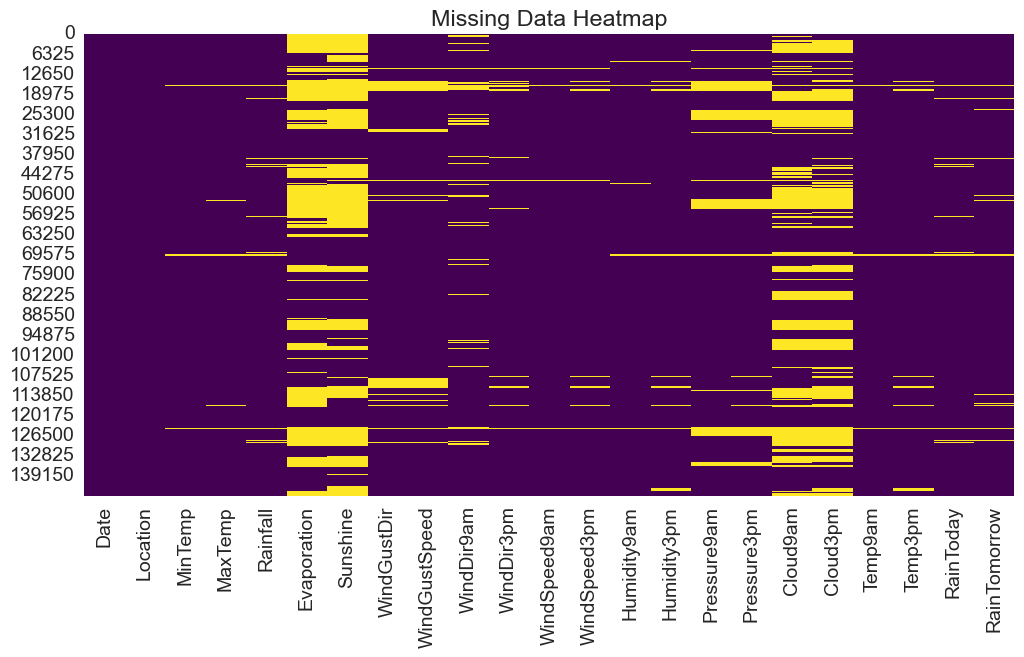

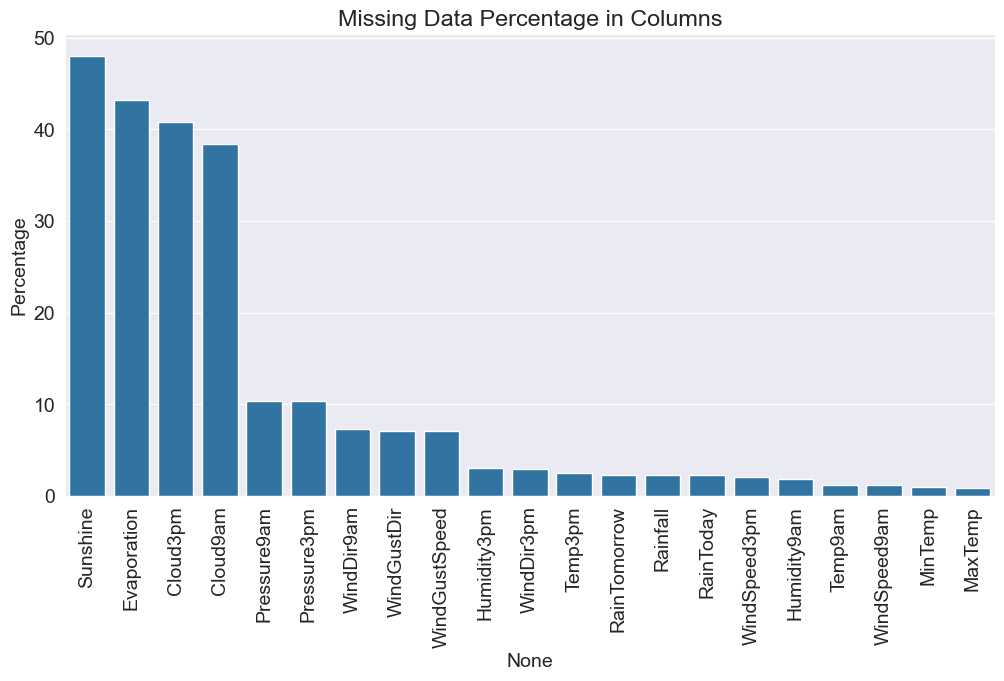

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(raw_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Bar plot for missing values
missing_data = raw_df.isnull().sum()
missing_percentage = (missing_data / len(raw_df)) * 100

plt.figure(figsize=(12, 6))
missing_data_sorted = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted)
plt.title('Missing Data Percentage in Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


In [11]:
# Separate numerical and categorical columns
numerical_cols = raw_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = raw_df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", numerical_cols)
print("Categorical Columns:\n", categorical_cols)


Numerical Columns:
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Columns:
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [12]:
# Convert 'Date' column to datetime format
raw_df['Date'] = pd.to_datetime(raw_df['Date'], errors='coerce')

# Extract the year from the Date column and create a new 'Year' column
raw_df['Year'] = raw_df['Date'].dt.year

# Check if the 'Date' column is properly converted
print(raw_df['Date'].head())
print(raw_df['Year'].head())


0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]
0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64


In [13]:
from sklearn.impute import KNNImputer

# KNN Imputation for numerical columns
knn_imputer = KNNImputer(n_neighbors=5)
raw_df[numerical_cols] = knn_imputer.fit_transform(raw_df[numerical_cols])

# Verify if the missing values are handled
print("Missing data after imputation:\n", raw_df.isnull().sum())


Missing data after imputation:
 Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
dtype: int64


In [14]:
# Mode imputation for categorical columns
for col in categorical_cols:
    raw_df[col].fillna(raw_df[col].mode()[0], inplace=True)

# Verify if the missing values are handled
print("Missing data after categorical imputation:\n", raw_df.isnull().sum())


Missing data after categorical imputation:
 Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
dtype: int64


In [17]:
# knnimputer took longer time hence save file in csv format
#raw_df.to_csv("processed_weather_data.csv", index=False)

## Saved data file, run the cell below to load

In [2]:
raw_df = pd.read_csv('processed_weather_data.csv')
raw_df['Date'] = pd.to_datetime(raw_df['Date'], errors='coerce')

In [3]:
# Summary statistics for numerical columns
raw_df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
count,145460,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,2013-04-04 21:08:51.907053568,12.196079,23.219169,2.350145,5.239592,8.059477,39.751745,14.031451,18.637740,68.947815,51.565023,1017.760950,1015.406277,3.968073,4.066951,16.969229,21.691627,2012.769751
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000
25%,2011-01-11 00:00:00,7.600000,18.000000,0.000000,3.240000,6.600000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,1.600000,2.000000,12.300000,16.700000,2011.000000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.780000,37.000000,13.000000,19.000000,70.000000,52.000000,1017.800000,1015.400000,3.600000,4.000000,16.700000,21.200000,2013.000000
75%,2015-06-14 00:00:00,16.800000,28.200000,0.800000,6.500000,10.100000,46.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1020.000000,7.000000,6.200000,21.500000,26.300000,2015.000000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000
std,NaN,6.379830,7.099329,8.396230,3.359819,3.018854,13.285456,8.880415,8.745559,18.927465,20.584024,6.854509,6.796024,2.611340,2.425498,6.484129,6.890855,2.537684


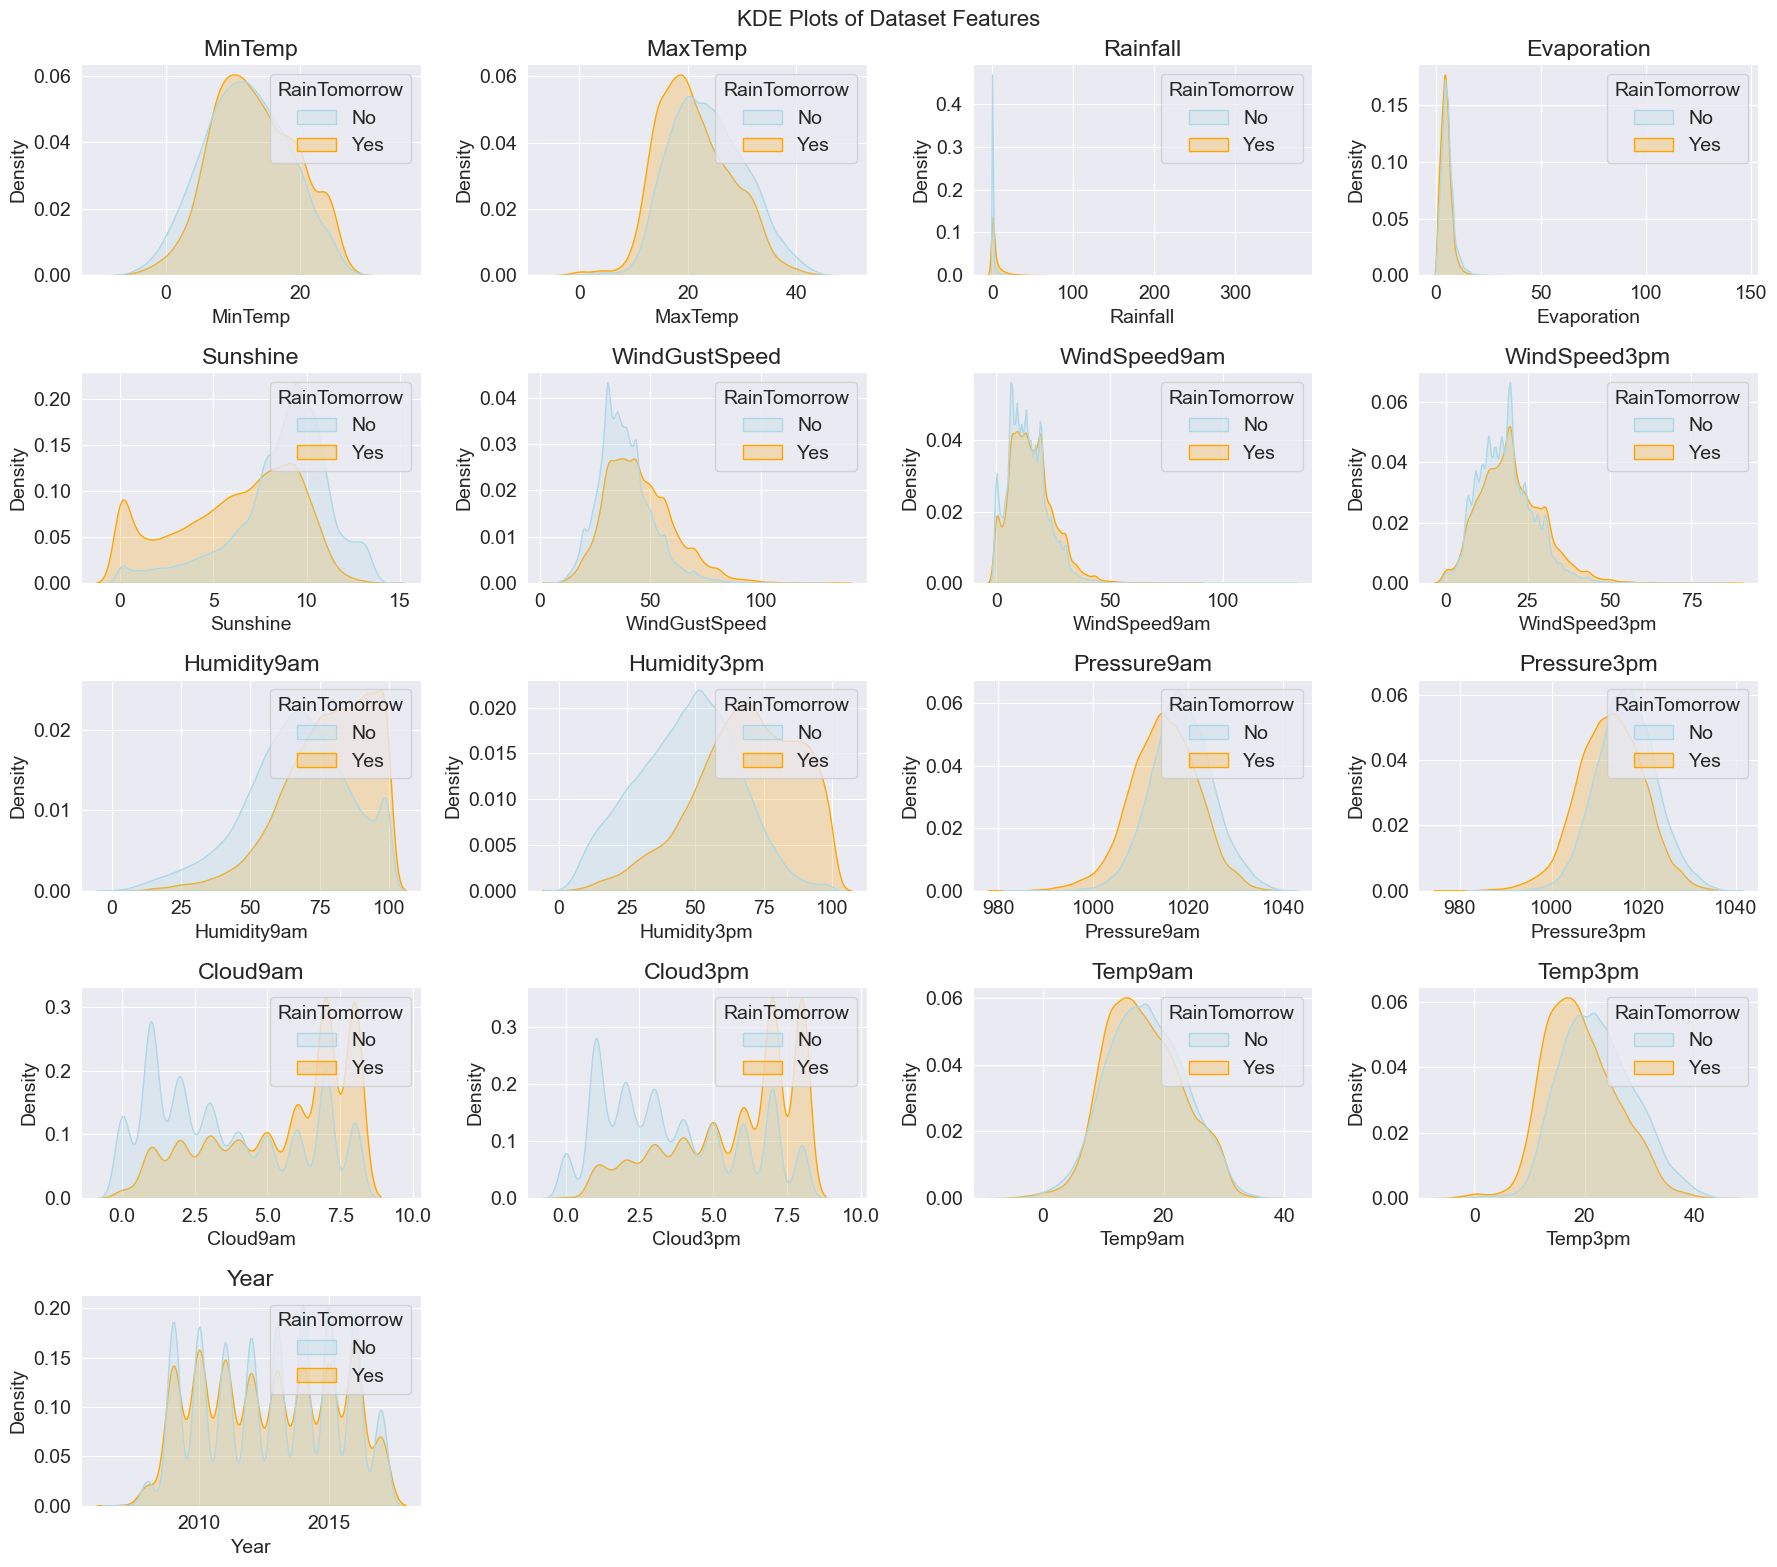

In [4]:
plt.figure(figsize=(18, 16))

# Loop through all numerical columns and plot KDE
for i, column in enumerate(raw_df.select_dtypes(include=["float64", "int64"]).columns, 1):
    plt.subplot(5, 4, i)  # Adjust subplot grid based on number of features
    sns.kdeplot(data=raw_df, x=column, hue="RainTomorrow", fill=True, common_norm=False, palette=["lightblue", "orange"])
    plt.title(column)

plt.suptitle("KDE Plots of Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

Upon analyzing the Rain in Australia dataset, two key observations emerge:

1. Extreme Outliers in Rainfall and Evaporation: The dataset exhibits extreme outliers, particularly in variables such as rainfall and evaporation. These outliers require careful consideration and appropriate treatment. They may represent exceptional weather events or potential data anomalies, and their presence can significantly impact statistical analyses and model performance. Addressing these outliers is crucial for developing a robust predictive model.
    
    
2. **Distinctive Distribution Patterns for Rain vs. No Rain**: Examination of density plots reveals notable differences in the distribution of several variables when comparing rainy days to non-rainy days. This distinction is particularly evident in the following variables:

   - Cloud cover (at 9am and 3pm)
   - Temperature (especially at 3pm)
   - Humidity (at 9am and 3pm)
   - Pressure
   - Sunshine
   - Wind gust speed

And the their clear distinct features is supported by the table below

RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

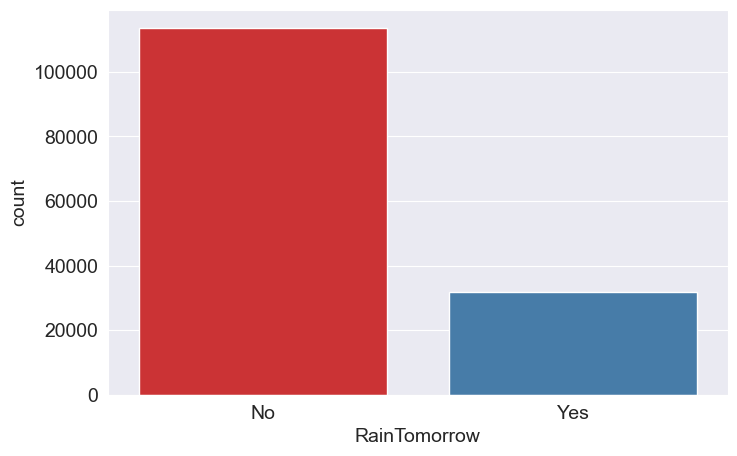

In [9]:
print(raw_df['RainTomorrow'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=raw_df, x='RainTomorrow', 
              palette='Set1')

In [10]:
num_col = raw_df.select_dtypes(include=["float64", "int64"]).columns
pivot_result = raw_df.pivot_table(index="RainTomorrow", values=num_col, aggfunc="mean")
pivot_result.T

RainTomorrow,No,Yes
Cloud3pm,3.602512,5.721826
Cloud9am,3.541612,5.487624
Evaporation,5.397349,4.677480
Humidity3pm,46.813090,68.496940
Humidity9am,66.415581,77.970578
MaxTemp,23.808162,21.120486
MinTemp,11.920366,13.178492
Pressure3pm,1016.164709,1012.703861
Pressure9am,1018.600612,1014.769094
Rainfall,1.312238,6.048379


1. Cloud Cover: Both Cloud3pm and Cloud9am values are higher on rainy days, indicating more cloud coverage preceding rainfall2.
2. Humidity: Humidity3pm and Humidity9am are notably higher on rainy days, suggesting a strong correlation between humidity and rainfall15.
3. Temperature: MaxTemp and Temp3pm are lower on rainy days, while MinTemp is slightly higher. This aligns with the observation that clouds can reduce daytime temperatures and increase nighttime temperatures2.
4. Pressure: Both Pressure3pm and Pressure9am are lower on rainy days, which is consistent with the association between low pressure systems and precipitation1.
5. Rainfall: The average Rainfall is significantly higher on days preceding rain, indicating a pattern of continued precipitation.
6. Sunshine: There are fewer hours of sunshine on days before rain, correlating with increased cloud cover1.
7. Wind: WindGustSpeed, WindSpeed3pm, and WindSpeed9am are all higher on rainy days, suggesting a connection between increased wind activity and rainfall15.
8. Evaporation: Evaporation is slightly lower on rainy days, likely due to higher humidity and lower temperatures.

These observations align with the findings from the search results, particularly the importance of variables such as temperature, humidity, pressure, wind speed, and cloud cover in rainfall prediction models

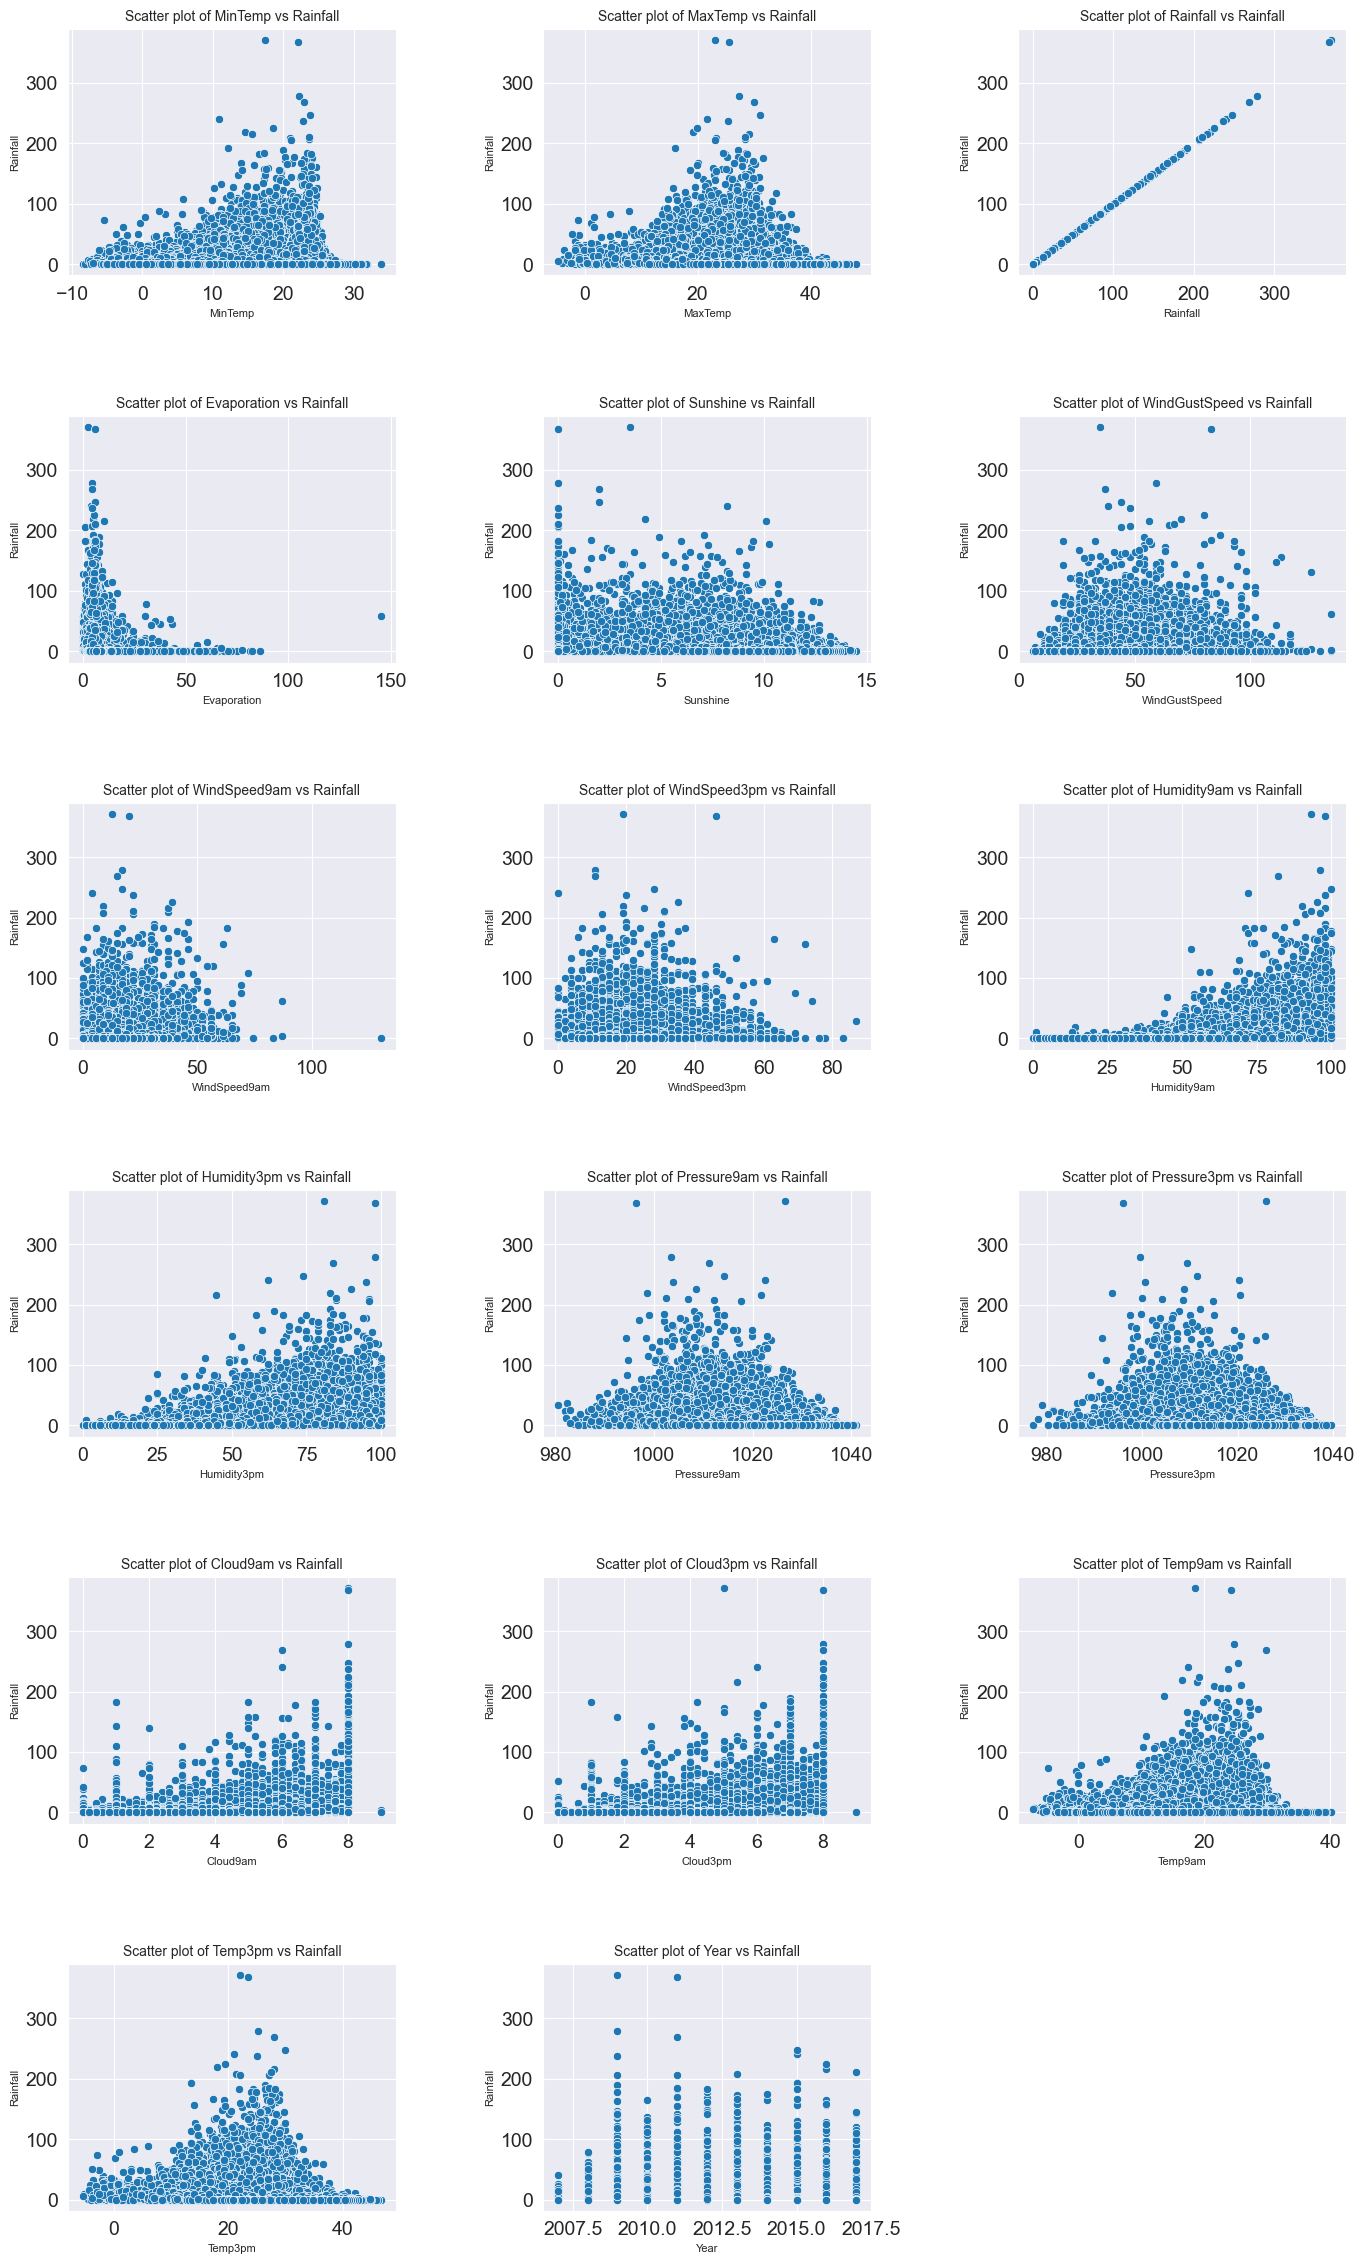

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numerical columns from the DataFrame
numerical_cols = raw_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns dynamically
num_columns = 3  # Number of columns per row
num_rows = (len(numerical_cols) + num_columns - 1) // num_columns  # Calculate number of rows

# Set the figure size dynamically
fig_size = (num_columns * 5, num_rows * 4)  # Adjust figure size based on the number of rows and columns

# Create subplots with better layout
plt.figure(figsize=fig_size)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_columns, i)  # Dynamically adjust subplots
    sns.scatterplot(data=raw_df, x=col, y='Rainfall')
    plt.title(f'Scatter plot of {col} vs Rainfall', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Rainfall', fontsize=8)

# Improve the spacing between subplots
plt.tight_layout(pad=4.0)
plt.show()


In [13]:
# Summary statistics for categorical columns
raw_df.describe(include ='O')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,20241,22324,15066,113580,113583


#### Temporal Analysis

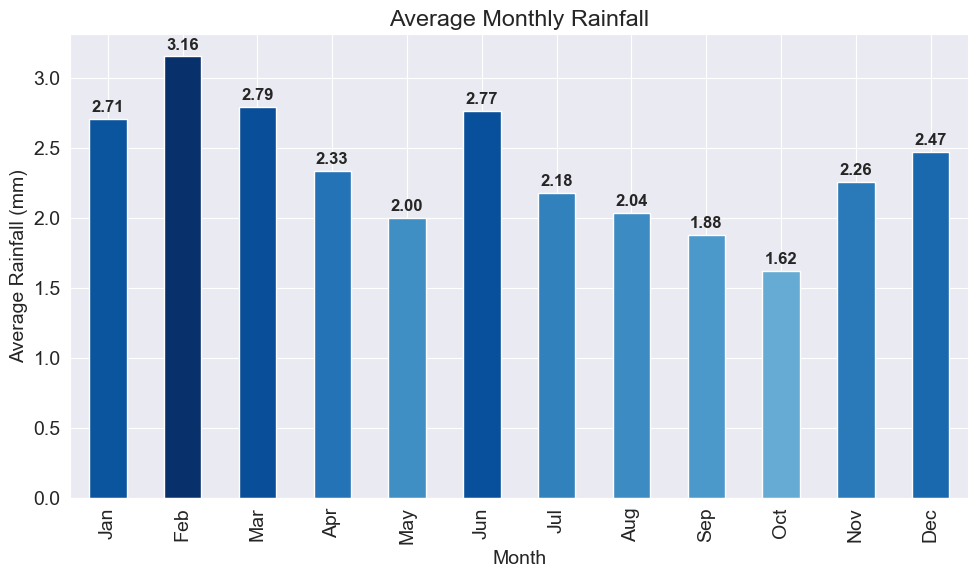

In [19]:
# extract the month to find seasonal variations
raw_df['Month'] = raw_df['Date'].dt.month

# Monthly rainfall patterns
monthly_rainfall = raw_df.groupby('Month')['Rainfall'].mean()

# Define colors based on the rainfall values (lighter color for lower rainfall, darker for higher)
colors = plt.cm.Blues(monthly_rainfall / max(monthly_rainfall))  # Normalize rainfall to the max value for color mapping

# Plotting
plt.figure(figsize=(10, 6))
bars = monthly_rainfall.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add the average value on top of each bar
for i, value in enumerate(monthly_rainfall):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

The average rainfall per month aligns with the typical rainfall patterns observed in Australia, which experiences significant variation in rainfall across different regions. The higher values in February (3.16) and March (2.79) indicate a peak in rainfall during late summer and early autumn, a period associated with the wet season in northern Australia, particularly in regions like Darwin and Cairns, where monsoonal rains are common from November to April. In contrast, the drop in rainfall from May (1.99) to October (1.62) reflects the drier conditions typical of southern and central Australia during the winter and early spring months, when rainfall is generally lower outside the wet season. Interestingly, the slight increase in December (2.47) suggests the onset of the wet season in tropical areas, marking the transition to heavier rainfall as the monsoon season begins. These trends mirror the seasonal weather patterns in countries with similarly diverse climates, where regional variations influence the timing and intensity of rainfall throughout the year.


In [20]:
# !pip install geopandas
# !pip install geodatasets
import geopandas as gpd
from geodatasets import get_path

# Load Australia shapefile 
australia = gpd.read_file("STE_2021_AUST_SHP_GDA2020/STE_2021_AUST_GDA2020.shp")

In [21]:
# Check the unique locations in your new_df
print(raw_df['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [22]:
state_grouping = {
    'New South Wales': ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
                        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
                        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong'],
    'Australian Capital Territory': ['Canberra', 'Tuggeranong', 'MountGinini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
                 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'],
    'Queensland': ['Brisbane', 'Cairns', 'GoldCoast', 'Townsville'],
    'South Australia': ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'],
    'Western Australia': ['Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
                          'Perth', 'SalmonGums', 'Walpole'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Northern Territory': ['AliceSprings', 'Darwin', 'Katherine', 'Uluru']
}

# Apply region mapping (default to 'Other' if location isn't listed)
raw_df['Region'] = raw_df['Location'].map(lambda loc: next((region for region, locations in state_grouping.items() if loc in locations), 'Other'))

# Check if the mapping worked correctly
print(raw_df[['Location', 'Region']].head())


  Location           Region
0   Albury  New South Wales
1   Albury  New South Wales
2   Albury  New South Wales
3   Albury  New South Wales
4   Albury  New South Wales


In [23]:
# Monthly rainfall patterns
state_rainfall = raw_df.groupby('Region')['Rainfall'].mean()
state_rainfall

Region
Australian Capital Territory    2.372680
New South Wales                 2.715004
Northern Territory              2.687954
Queensland                      3.979591
South Australia                 1.388141
Tasmania                        1.802070
Victoria                        1.713158
Western Australia               2.045988
Name: Rainfall, dtype: float64

In [24]:
australia.columns

Index(['STE_CODE21', 'STE_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'AUS_CODE21',
       'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'geometry'],
      dtype='object')

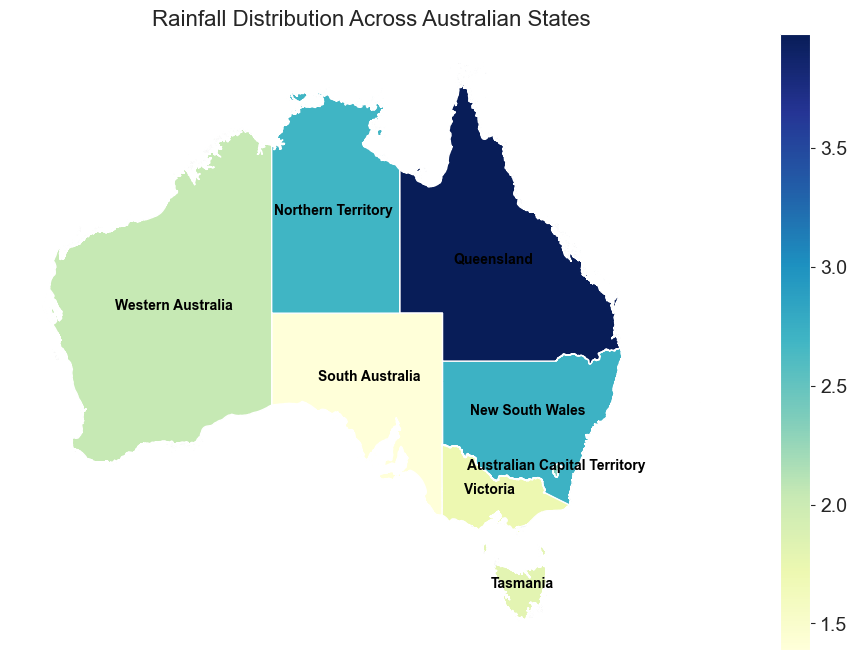

In [28]:
# Map rainfall data to the states in your shapefile (ensure 'STE_NAME21' matches the column in your data)
australia['rainfall'] = australia['STE_NAME21'].map(state_rainfall)
# Filter out states where rainfall is missing (NaN)
australia = australia[australia['rainfall'].notna()]

# Reproject the geometry to a projected CRS (e.g., UTM)
australia = australia.to_crs(epsg=3395) 
# Plot the map with the rainfall distribution
fig, ax = plt.subplots(figsize=(12, 8))
australia.plot(column='rainfall', cmap='YlGnBu', legend=True, ax=ax)

# Add state names on the map
for x, y, label in zip(australia.geometry.centroid.x, australia.geometry.centroid.y, australia['STE_NAME21']):
    ax.text(x, y, label, fontsize=10, ha='center', color='black', fontweight='bold')

# Set title and remove axes
plt.title('Rainfall Distribution Across Australian States', fontsize=16)
plt.axis('off')
plt.show()

**Queensland (3.98 mm):**

Queensland experiences the highest average rainfall among the regions. This is consistent with its tropical climate, which sees significant rainfall during the monsoon season (roughly November to April). Tropical regions like Cairns and Townsville are affected by heavy rains, especially in summer, which supports the higher rainfall value for Queensland.

**New South Wales (2.72 mm):**

New South Wales falls into the mid-range for rainfall, with values higher than regions like Victoria and South Australia. The state's climate varies significantly, from the temperate coastal areas (Sydney, Newcastle) to the drier inland. The average rainfall here reflects the variability between these different areas, with coastal areas receiving more rainfall, especially during the summer.

**Northern Territory (2.69 mm):**

The Northern Territory, including cities like Darwin, experiences a monsoonal climate, with wet summers and dry winters. The high rainfall is consistent with the wet season from November to April, contributing to the average rainfall value.
    
**Western Australia (2.05 mm):**

Western Australia has a range of climates, from tropical in the north (Broome) to arid in the south (Perth). This region is heavily influenced by seasonal rainfall, with higher rainfall during the winter months in the south and dry conditions during summer. The value of 2.05 mm is likely reflective of these seasonal patterns and the combination of arid and tropical zones.

**Australian Capital Territory (2.37 mm):**

The ACT's rainfall is typical for its temperate climate. Canberra and surrounding areas receive moderate rainfall throughout the year, with a peak in spring and summer. The figure of 2.37 mm fits well with the state’s known rainfall characteristics.

**Tasmania (1.80 mm):**

Tasmania, with its cooler, more temperate climate, receives consistent rainfall throughout the year. The figure of 1.80 mm is slightly lower than the mainland states but still reflects Tasmania’s relatively high and consistent rainfall, especially on the west coast.

**Victoria (1.71 mm):**

Victoria is a state with a Mediterranean climate, characterized by relatively dry summers and wetter winters. The average rainfall figure of 1.71 mm is reflective of this, with the coastal regions, including Melbourne, receiving more rain than the inland areas.

**South Australia (1.39 mm):**

South Australia has the lowest rainfall, particularly in the interior regions, which are classified as semi-arid or arid. The value of 1.39 mm is consistent with the generally dry conditions across the state, especially during the summer months when much of the state receives little rainfall.

In [29]:
# Aggregate: Average Rainfall per Month for Each Region
rainfall_by_region = raw_df.groupby(['Month', 'Region'])['Rainfall'].mean().reset_index()
# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Replace the month numbers with month names
rainfall_by_region['Month_name'] = rainfall_by_region['Month'].apply(lambda x: month_names[x - 1])

rainfall_by_region.head()

,Month,Region,Rainfall,Month_name
0,1,Australian Capital Territory,2.115248,January
1,1,New South Wales,2.855834,January
2,1,Northern Territory,7.498015,January
3,1,Queensland,8.678925,January
4,1,South Australia,0.759606,January


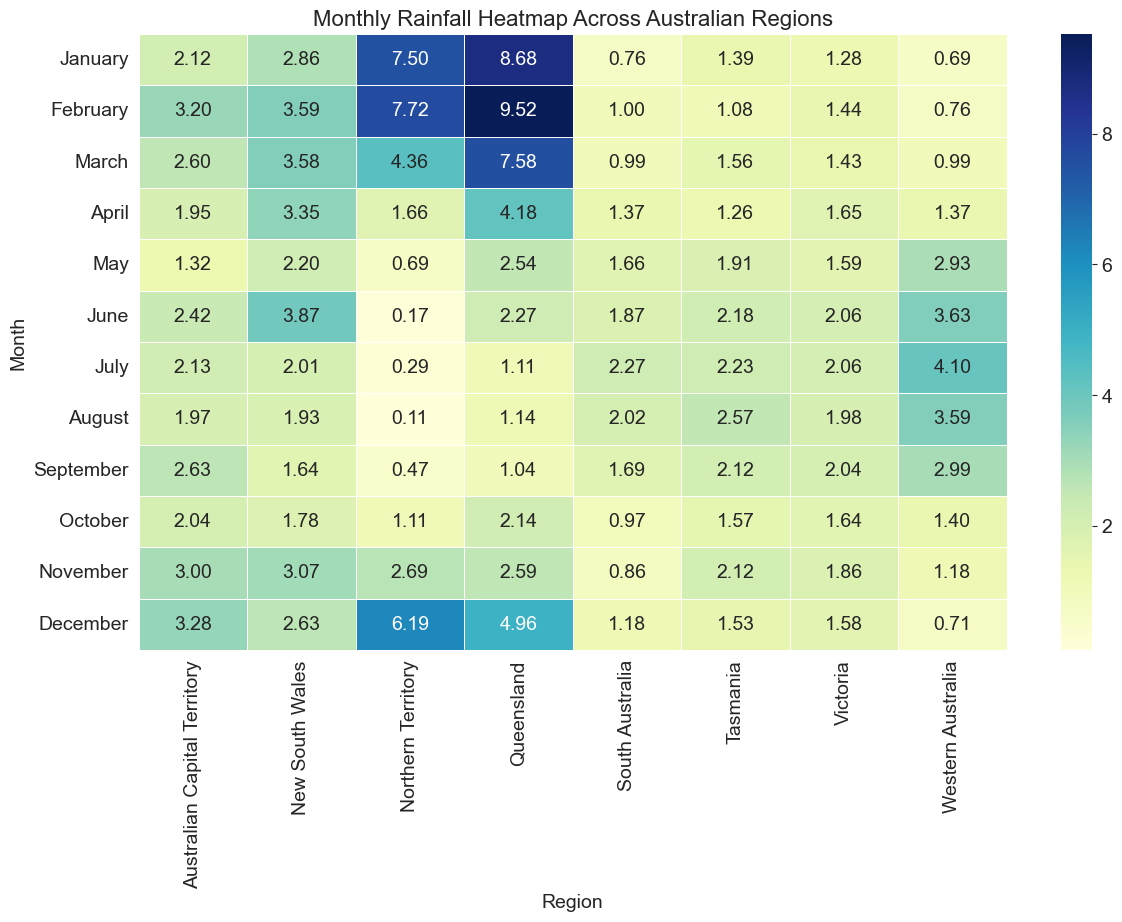

In [30]:
# Set 'Month_name' as a categorical type with the specified order
rainfall_by_region['Month_name'] = pd.Categorical(rainfall_by_region['Month_name'], categories=month_names, ordered=True)

# Reshape the data to create a pivot table
#rainfall_pivot = rainfall_by_region.pivot('Month_name', 'Region', 'Rainfall')
rainfall_pivot = rainfall_by_region.pivot(index='Month_name', columns='Region', values='Rainfall')


# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(rainfall_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)

# Add title
plt.title('Monthly Rainfall Heatmap Across Australian Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

- **Tropical regions (like Queensland and the Northern Territory)** naturally have high rainfall during the wet season (January to March and a bit in April), with rainfall levels peaking in these months due to the monsoon seasons and humid conditions and drops after the wet season. November and December also show considerable rainfall, as the wet season extends into the later months of the year.Monsoom seasons starts from Novemeber and ends in March

- **Coastal regions (like New South Wales, and Tasmania)** typically see more consistent, moderate rainfall, with summer(December-February) and autumn(March-May) being wetter.


- **Desert and semi-arid regions (like South Australia and the central parts of Western Australia)** have much lower rainfall, especially during the summer months. Rainfall tends to peak in the autumn and winter months (April to July) especially for Western Australia


- The data suggests that the **Australian Capital Territory** follows a typical temperate climate pattern with moderate rainfall during the summer months and drier conditions in winter. The region does not show signs of monsoon rainfall, which is characteristic of tropical climates. Instead, it experiences sporadic rainfall throughout the year, with a slight peak during the summer.

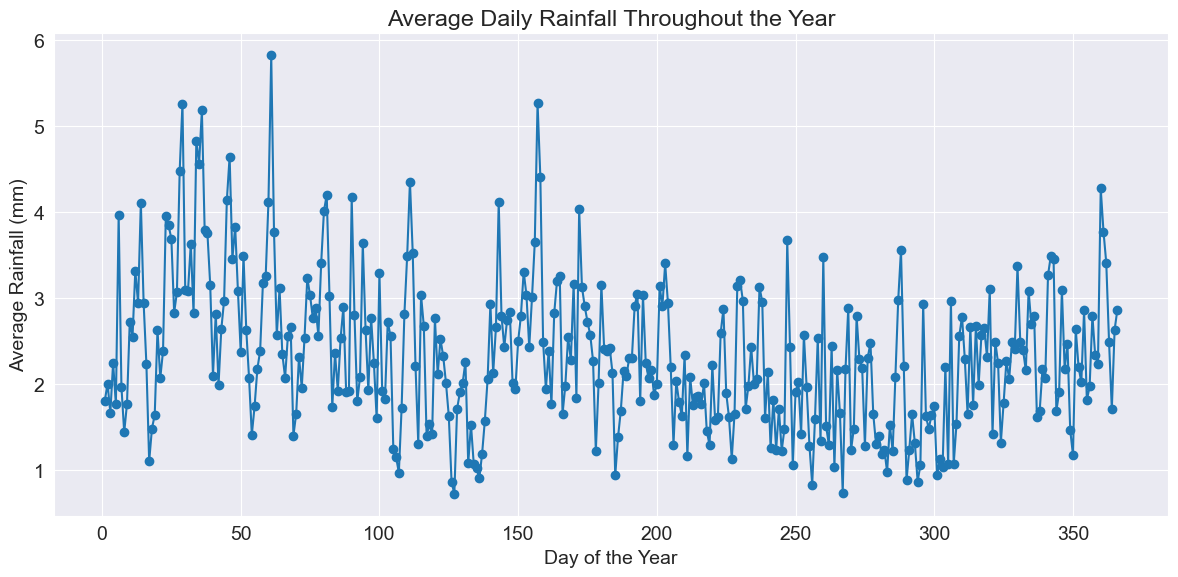

In [31]:
raw_df['DayOfYear'] = raw_df['Date'].dt.dayofyear
# Yearly rainfall patterns
yearly_rainfall = raw_df.groupby('DayOfYear')['Rainfall'].mean()

plt.figure(figsize=(12, 6))
yearly_rainfall.plot(kind='line', marker='o')
plt.title('Average Daily Rainfall Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Rainfall (mm)')
plt.tight_layout()
plt.show()


### Wind Direction

In [32]:
#!pip install windrose
from windrose import WindroseAxes

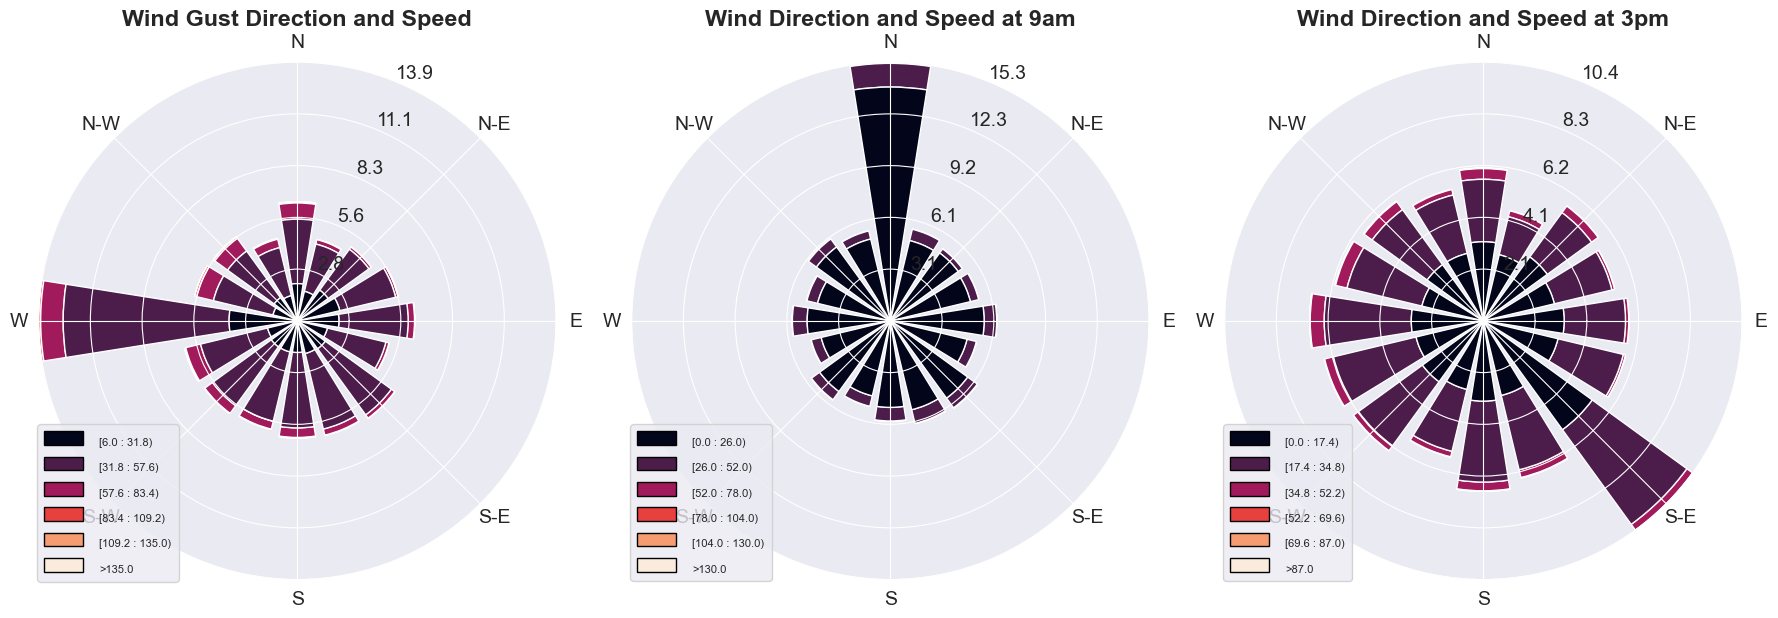

In [33]:
# Assuming your DataFrame is named 'raw_df'
df = raw_df.copy()

# Function to convert wind direction to angles
def wind_dir_to_angle(direction):
    dir_to_angle = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
                    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 
                    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 
                    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
    return dir_to_angle.get(direction, np.nan)

# Convert wind directions to angles
df['WindGustDirAngle'] = df['WindGustDir'].apply(wind_dir_to_angle)
df['WindDir9amAngle'] = df['WindDir9am'].apply(wind_dir_to_angle)
df['WindDir3pmAngle'] = df['WindDir3pm'].apply(wind_dir_to_angle)

# Ensure 'RainTomorrow' is binary
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Remove rows with NaN values in relevant columns
columns_to_check = ['WindGustDirAngle', 'WindDir9amAngle', 'WindDir3pmAngle', 
                    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                    'Rainfall', 'RainTomorrow']
df = df.dropna(subset=columns_to_check)

# Create a single figure for all three wind rose plots
fig = plt.figure(figsize=(18, 8))

# Modify the plot_wind_rose function to use a specific subplot
def plot_wind_rose(data, direction, speed, title, subplot_pos):
    ax = fig.add_subplot(subplot_pos, projection='windrose')
    ax.bar(data[direction], data[speed], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    ax.set_title(title, fontweight='bold')

# Create wind rose plots
plot_wind_rose(df, 'WindGustDirAngle', 'WindGustSpeed', 'Wind Gust Direction and Speed', 131)
plot_wind_rose(df, 'WindDir9amAngle', 'WindSpeed9am', 'Wind Direction and Speed at 9am', 132)
plot_wind_rose(df, 'WindDir3pmAngle', 'WindSpeed3pm', 'Wind Direction and Speed at 3pm', 133)

plt.tight_layout()
plt.show()


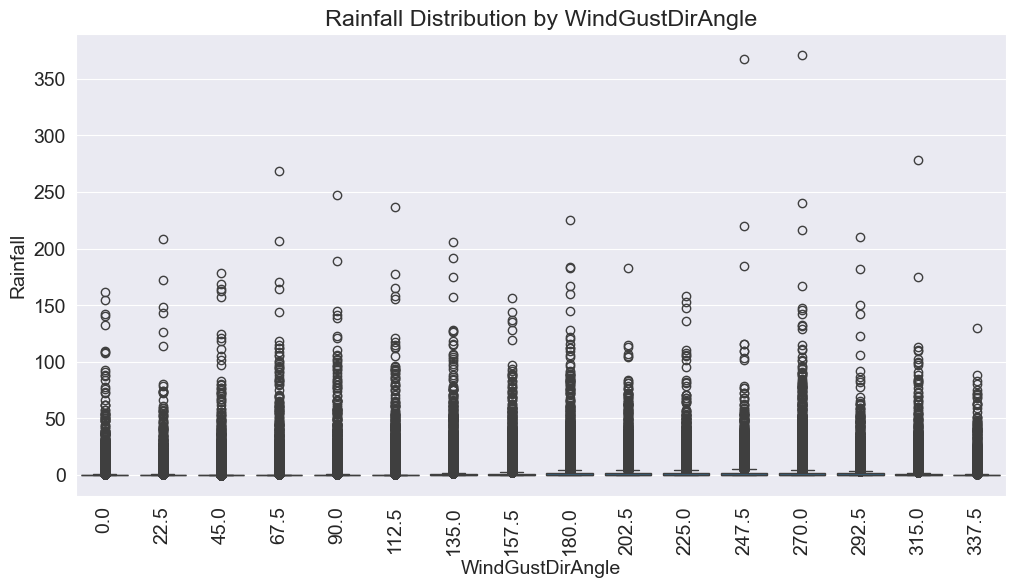

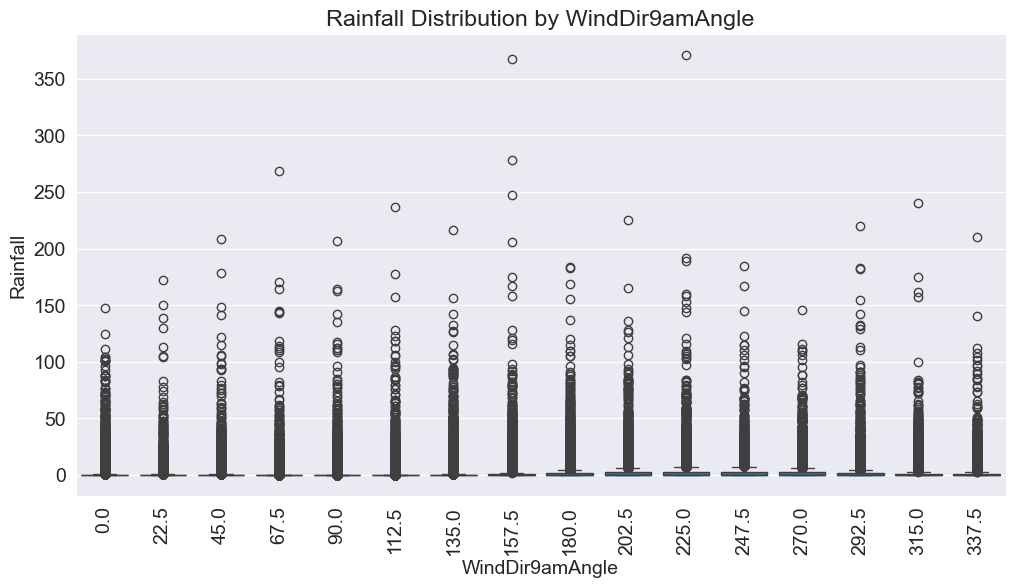

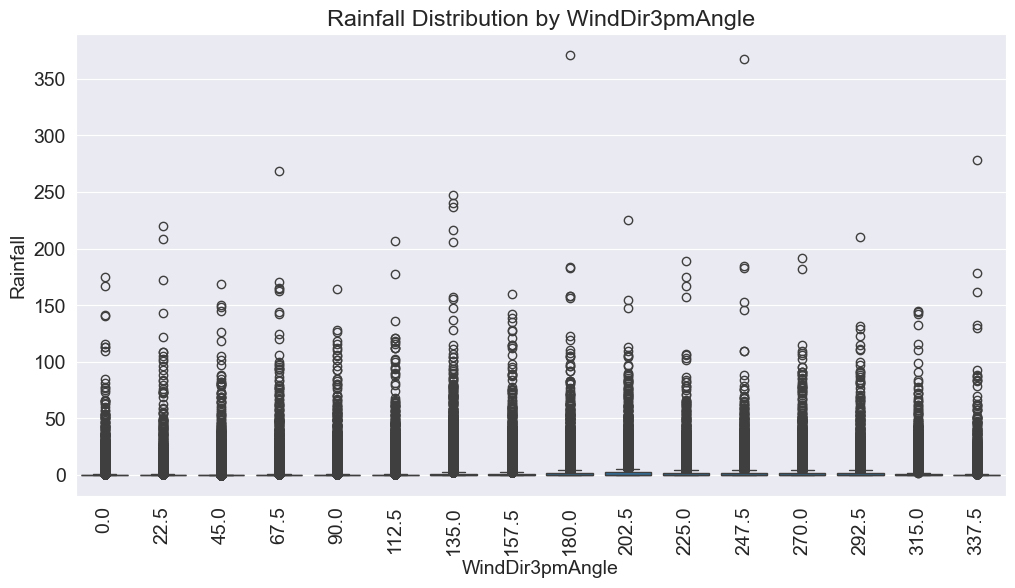

In [34]:
# Analyze relationship with rainfall
wind_dirs = ['WindGustDirAngle', 'WindDir9amAngle', 'WindDir3pmAngle']

for wind_dir in wind_dirs:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=wind_dir, y='Rainfall', data=df)
    plt.title(f'Rainfall Distribution by {wind_dir}')
    plt.xticks(rotation=90)
    plt.show()

Correlation between wind direction change and rain tomorrow: -0.03233730735168414

Probability of rain tomorrow based on wind direction change:
WindDirChange
0    0.248829
1    0.213118
Name: RainTomorrow, dtype: float64


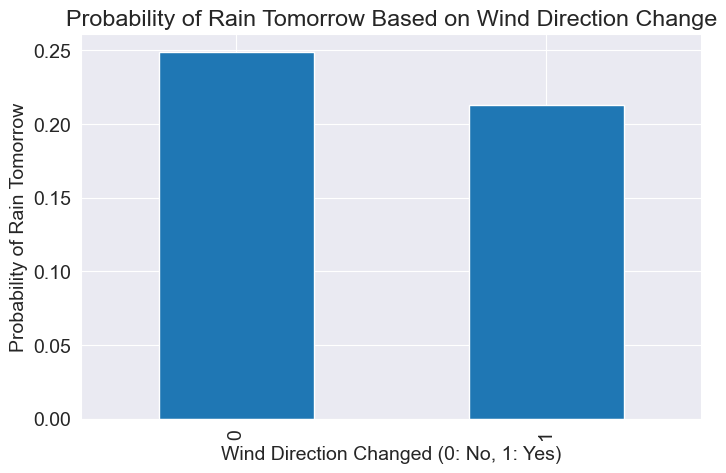

In [35]:
# Calculate correlation between wind direction changes and rainfall
df['WindDirChange'] = (df['WindDir9am'] != df['WindDir3pm']).astype(int)
correlation = df['WindDirChange'].corr(df['RainTomorrow'])
print(f"Correlation between wind direction change and rain tomorrow: {correlation}")

# Analyze wind direction change and rainfall probability
wind_change_rain_prob = df.groupby('WindDirChange')['RainTomorrow'].mean()
print("\nProbability of rain tomorrow based on wind direction change:")
print(wind_change_rain_prob)

# Visualize wind direction change and rainfall probability
plt.figure(figsize=(8, 5))
wind_change_rain_prob.plot(kind='bar')
plt.title('Probability of Rain Tomorrow Based on Wind Direction Change')
plt.xlabel('Wind Direction Changed (0: No, 1: Yes)')
plt.ylabel('Probability of Rain Tomorrow')
plt.show()

When wind direction remained stable or do not change (0), the probability of rain was around 24.88%. And when wind direction changed (1), the probability of rain tomorrow is 0.213118 or about 21.31%. This suggest that stable wind conditions might correlate with a higher chance of rain the next day. But this correlation is very well -0.03233730735168414 and can be neglected

### Rain Today vs Rain Tomorrow

RainTomorrow          0          1
RainToday                         
No            84.786054  15.213946
Yes           54.212673  45.787327


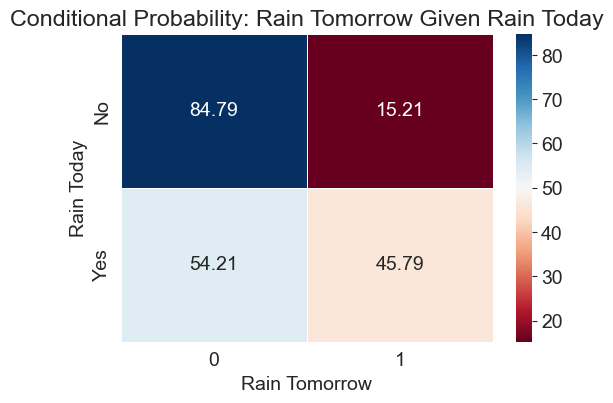

In [36]:
cp_2 = pd.crosstab(df['RainToday'], df['RainTomorrow'])
cp_2 = cp_2.div(cp_2.sum(axis=1), axis=0) * 100
print(cp_2)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cp_2, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)
plt.title("Conditional Probability: Rain Tomorrow Given Rain Today")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Rain Today")
plt.show()

**If it did not rain today (RainToday = No):**
 - There is an 84.79% chance that it will not rain tomorrow.
 - There is a 15.21% chance that it will rain tomorrow.

**If it rained today (RainToday = Yes):**
 - There is a 54.21% chance that it will not rain tomorrow.
 - There is a 45.79% chance that it will rain tomorrow.
 
Hence we can say that, the probability of rain tomorrow increases significantly if it rained today (from 15.21% to 45.79%). This suggests that rainfall tends to persist, meaning if it rains one day, the next day is more likely to also have rain. However, rain today does not guarantee rain tomorrow, as the probability is still below 50%.

### Treating the data for analysis

Since next-day rainfall prediction, daily patterns might still be relevant

In [37]:
# df['Day'] = df['Date'].dt.day
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# Cyclical encoding for month and day of year
df['MonthSin'] = np.sin(df['Month'] * (2 * np.pi / 12))
df['MonthCos'] = np.cos(df['Month'] * (2 * np.pi / 12))
df['DayOfYearSin'] = np.sin(df['DayOfYear'] * (2 * np.pi / 365.25))
df['DayOfYearCos'] = np.cos(df['DayOfYear'] * (2 * np.pi / 365.25))

In [38]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Region',
       'DayOfYear', 'WindGustDirAngle', 'WindDir9amAngle', 'WindDir3pmAngle',
       'WindDirChange', 'MonthSin', 'MonthCos', 'DayOfYearSin',
       'DayOfYearCos'],
      dtype='object')

In [39]:
df_select = df[['Date', 'MinTemp', 'MaxTemp', 'Evaporation',
       'Sunshine', 'WindGustSpeed',"Rainfall",
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'WindGustDirAngle', 'WindDir9amAngle', 'WindDir3pmAngle',
       'MonthSin', 'MonthCos','DayOfYearSin', 'DayOfYearCos',"RainTomorrow"]]

In [40]:
# Detect outliers for numeric columns only
numeric_columns = df_select.select_dtypes(include=['number']).columns
# Create a dictionary to store the outliers count for each column
outliers_count = {}

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

for col in numeric_columns:
    outliers = detect_outliers_iqr(df_select[col])
    outliers_count[col] = outliers.sum()

# Print the outlier counts for each numeric column
for col, count in outliers_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in MinTemp: 63
Number of outliers in MaxTemp: 545
Number of outliers in Evaporation: 5915
Number of outliers in Sunshine: 7078
Number of outliers in WindGustSpeed: 5529
Number of outliers in Rainfall: 26681
Number of outliers in WindSpeed9am: 1819
Number of outliers in WindSpeed3pm: 2523
Number of outliers in Humidity9am: 1425
Number of outliers in Humidity3pm: 0
Number of outliers in Pressure9am: 1848
Number of outliers in Pressure3pm: 1387
Number of outliers in Cloud9am: 0
Number of outliers in Cloud3pm: 0
Number of outliers in Temp9am: 325
Number of outliers in Temp3pm: 885
Number of outliers in WindGustDirAngle: 0
Number of outliers in WindDir9amAngle: 0
Number of outliers in WindDir3pmAngle: 0
Number of outliers in MonthSin: 0
Number of outliers in MonthCos: 0
Number of outliers in DayOfYearSin: 0
Number of outliers in DayOfYearCos: 0
Number of outliers in RainTomorrow: 31877


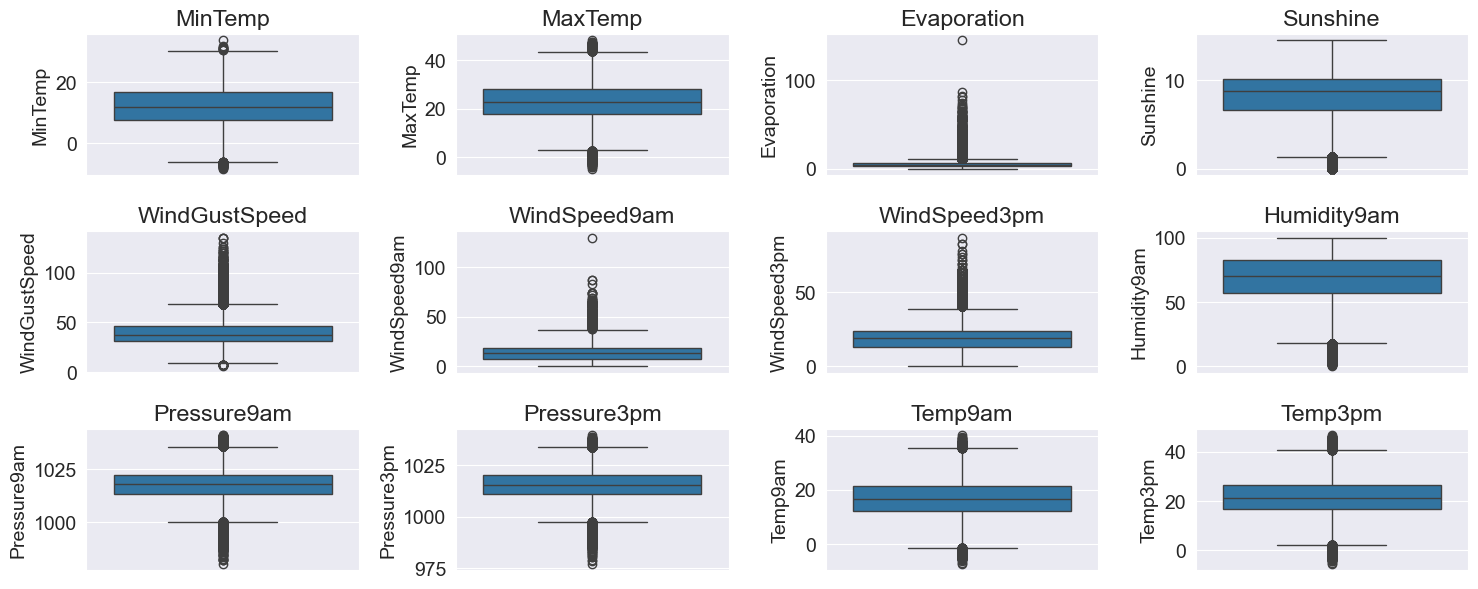

In [41]:
# Select numerical columns with potential outliers
outlier_columns = ["MinTemp", "MaxTemp", "Evaporation", "Sunshine", 
                   "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
                   "Humidity9am", "Pressure9am", "Pressure3pm",
                   "Temp9am", "Temp3pm"]

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each column
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(4, 4, i)  # Arrange in a grid
    sns.boxplot(y=df_select[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [42]:
# remove extreme remove where evaporation = 100 / windspeed9am > 100
df_select = df_select[df_select['Evaporation'] < 100]
df_select = df_select[df_select['WindSpeed9am']<100]

In [43]:
# Create lag features for numerical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                  'Pressure9am', 'Pressure3pm', 
                  'Temp9am', 'Temp3pm',"Rainfall"]

# Apply log transformation to the numerical columns
df_select[numerical_cols] = df_select[numerical_cols].apply(lambda x: np.log1p(x.clip(lower=0)))

# # Function to create lag features
# def create_lag_features(df, columns, lag=1):
#     for col in columns:
#         df[f'{col}_lag{lag}'] = df.groupby('Location')[col].shift(lag)
#     return df

# # Apply lag features
# df_select = create_lag_features(df_select, numerical_cols)

# Drop rows with NaN values created by lag features
df_ready = df_select.copy()

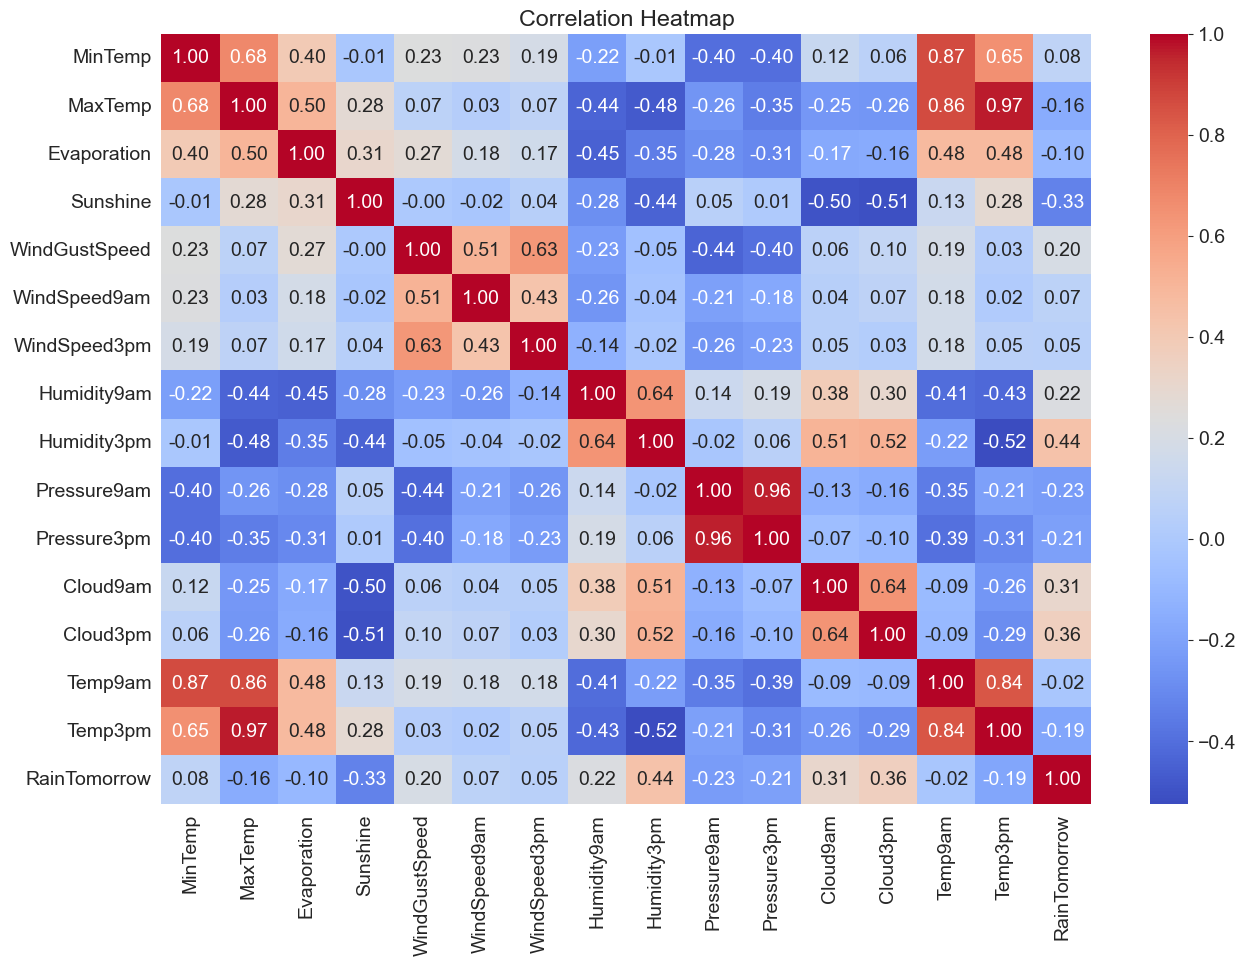

In [44]:
# Calculate the correlation matrix for numerical columns
num_col = df_ready[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                  'Temp9am', 'Temp3pm', "RainTomorrow"]]
corr_matrix = num_col.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


## Feature selection

In [45]:
# import your model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

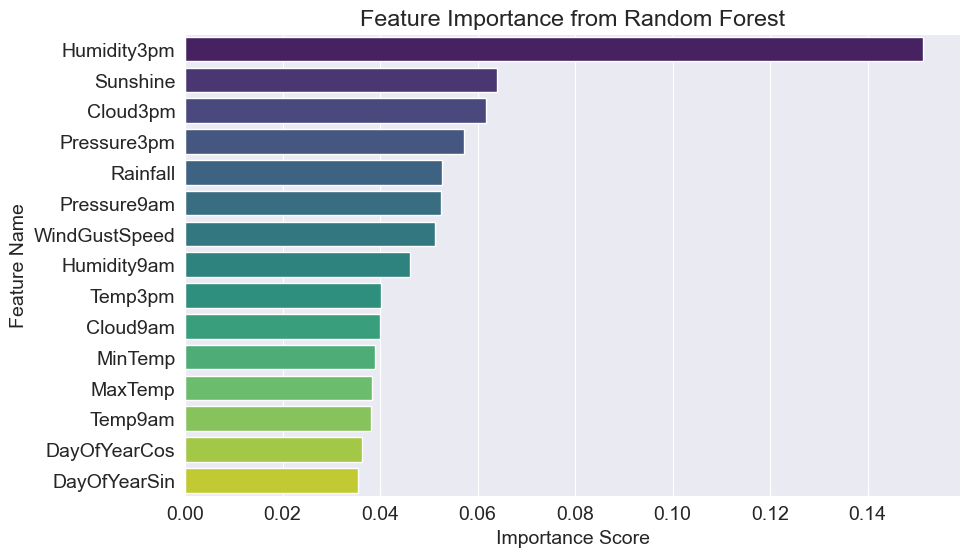

In [46]:
# Split features and target
X = df_ready.drop(columns=['Date', "RainTomorrow"])  
y = df_ready["RainTomorrow"]  

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(15)  # Select top 15 features

# Use only selected features
X_new = X[top_features.index]

# Convert to DataFrame for plotting
feature_imp_df = top_features.reset_index()
feature_imp_df.columns = ['Feature', 'Importance']

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [511]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

# X = df_ready.drop(columns=["RainTomorrow"])  # Features
# y = df_ready["RainTomorrow"]  # Target

# # Select top 10 features based on chi-square scores
# chi2_selector = SelectKBest(mutual_info_classif, k=15)
# X_new = chi2_selector.fit_transform(X, y)

# # Get selected feature names
# selected_features = X.columns[chi2_selector.get_support()]
# print(selected_features)

In [359]:

# # select
# df_model = df_ready[["Location", 'MaxTemp', 'Sunshine','WindGustSpeed', 'Humidity9am', 
#                   'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
#                   'Temp3pm', "RainTomorrow", "DayOfYearSin",
#                      "DayOfYearCos"]]
# columns_to_lag = ['MaxTemp', 'Sunshine','WindGustSpeed', 'Humidity9am', 
#                   'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
#                   'Temp3pm']

# for col in columns_to_lag:
#     for lag in range(1, 4):  # Creates lag1, lag2, lag3
#         df_model[f"{col}_Lag{lag}"] = df_model.groupby('Location')[col].shift(lag)

# # Drop first N rows since they will have NaN values after shifting
# df_model.dropna(inplace=True)

# Modeling

In [47]:
df_ready['Date'].min()

Timestamp('2007-11-01 00:00:00')

In [48]:
df_ready['Date'].max()

Timestamp('2017-06-25 00:00:00')

In [49]:
# Define split date (Before 2014 for training, 2014+ for testing)
split_date = pd.to_datetime("2015-01-01")

# Convert Date to datetime
df_ready["Date"] = pd.to_datetime(df_ready["Date"])

# Split into train and test based on date
train_data = df_ready[df_ready["Date"] < split_date]
test_data = df_ready[df_ready["Date"] >= split_date]

# Drop Date column (not needed for training)
train_data = train_data.drop(columns=["Date"])
test_data = test_data.drop(columns=["Date"])

# Ensure X_new contains only the selected feature names
selected_features = X_new.columns  # Assuming X_new is a DataFrame

# Extract only the selected features for training and testing
X_train = train_data[selected_features].copy()
y_train = train_data["RainTomorrow"]

X_test = test_data[selected_features].copy()
y_test = test_data["RainTomorrow"]

# scaling the feature
sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

# Convert scaled features back to DataFrame
x_train_sc = pd.DataFrame(x_train_sc, columns=X_train.columns)
x_test_sc = pd.DataFrame(x_test_sc, columns=X_test.columns)

print("Shape of X_train:", x_train_sc.shape)
print("Shape of X_test:", x_test_sc.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (101018, 15)
Shape of X_test: (44440, 15)
Shape of y_train: (101018,)
Shape of y_test: (44440,)


In [ ]:
# for col in columns_to_lag:
#     for lag in range(1, 4):  # Creates lag1, lag2, lag3
#         df_model[f"{col}_Lag{lag}"] = df_model.groupby('Location')[col].shift(lag)

# Drop first N rows since they will have NaN values after shifting
# df_model.dropna(inplace=True)

In [522]:
x_train_sc.head()

,Humidity3pm,Sunshine,Cloud3pm,Pressure3pm,Rainfall,Pressure9am,WindGustSpeed,Humidity9am,Temp3pm,Cloud9am,MinTemp,MaxTemp,Temp9am,DayOfYearCos,DayOfYearSin
0,-0.122824,0.986458,-1.262334,0.574717,-0.545042,0.561968,-0.053628,-0.613376,0.201439,-1.135088,0.198144,0.470965,0.473462,0.873555,-1.148472
1,-1.921752,1.027432,-1.262334,-0.954159,-0.545042,-0.689923,0.598547,-2.235374,1.644196,-1.441154,0.243665,1.638840,1.178719,1.385943,0.310602
2,-0.268683,-0.047563,-0.025813,0.764730,0.424782,0.837128,-1.102173,1.006617,-0.383287,1.160402,-0.573021,-0.367254,-1.114077,-0.620408,-1.291809
3,0.411992,0.451202,-1.097464,0.633209,-0.172306,0.894992,-2.346209,0.943765,-0.475365,-0.446441,-0.306557,-0.611506,-0.785839,-0.788050,-1.193127
4,-0.754880,0.857967,-1.674508,-0.334841,-0.545042,0.184603,-0.678304,-0.305456,0.612588,-1.517670,0.254830,0.611589,0.258359,0.207577,-1.427371


### Gradient Boosting Classifier

In [50]:
gboost = GradientBoostingClassifier(random_state=42)
gboost.fit(x_train_sc, y_train)
y_pred_gboost = gboost.predict(x_test_sc)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gboost)
print(f"Model Accuracy: {accuracy:.4f}")
# Classification Report
print("Decision tree")
print(classification_report(y_test, y_pred_gboost))

print(confusion_matrix(y_test, y_pred_gboost))

Model Accuracy: 0.8447
Decision tree
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34846
           1       0.72      0.46      0.56      9594

    accuracy                           0.84     44440
   macro avg       0.79      0.71      0.73     44440
weighted avg       0.83      0.84      0.83     44440

[[33109  1737]
 [ 5166  4428]]


In [90]:
# Applying SMOTEENN for balancing
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(x_train_sc, y_train)


gboost.fit(X_resampled, y_resampled)

# Make predictions
y_pred_gboost_st = gboost.predict(x_test_sc)
y_proba_gbst = gboost.predict_proba(x_test_sc)[:, 1]  # Probability scores for ROC-AUC


# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gboost_st)
print(f"Model Accuracy: {accuracy:.4f}")
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba_gbst)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# Classification Report
print("Decision tree")
print(classification_report(y_test, y_pred_gboost_st))

print(confusion_matrix(y_test, y_pred_gboost_st))

Model Accuracy: 0.7462
ROC-AUC Score: 0.8501
Decision tree
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     34846
           1       0.45      0.80      0.58      9594

    accuracy                           0.75     44440
   macro avg       0.69      0.77      0.70     44440
weighted avg       0.83      0.75      0.77     44440

[[25475  9371]
 [ 1909  7685]]


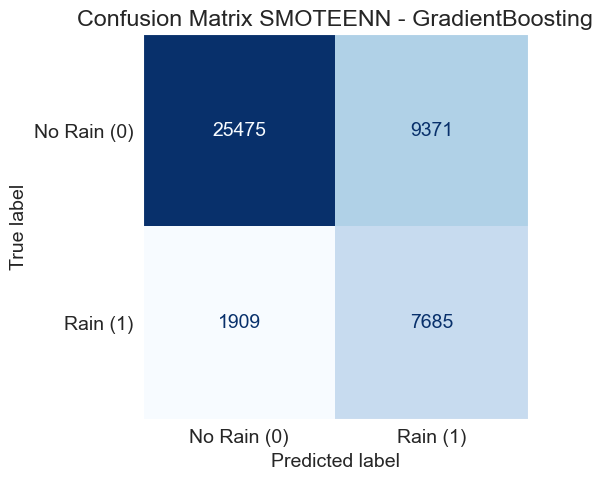

In [54]:
# confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))

# Create the confusion matrix
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_gboost_st),
    display_labels=["No Rain (0)", "Rain (1)"]
)

# Plot the confusion matrix without grid lines and with custom colors
conf_matrix.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)  # Remove grid lines
plt.title("Confusion Matrix SMOTEENN - GradientBoosting")
plt.show()

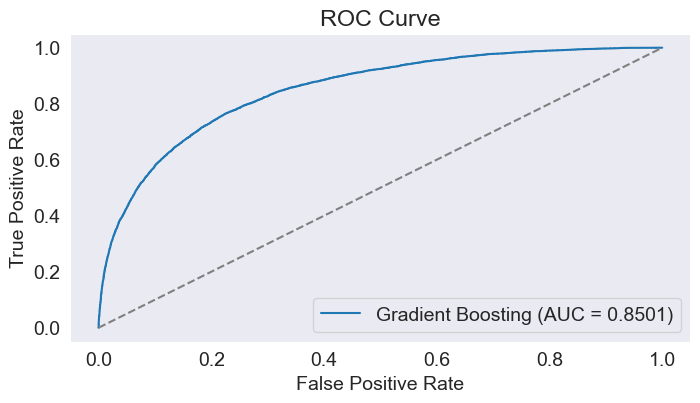

In [61]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_gbst)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

grid_search.fit(X_resampled, y_resampled)

print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [56]:
# Applying SMOTETomek for balancing
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(x_train_sc, y_train)


gboost.fit(X_resampled, y_resampled)

# Make predictions
y_pred_gboost_sm = gboost.predict(x_test_sc)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gboost_sm)
print(f"Model Accuracy: {accuracy:.4f}")
# Classification Report
print("Decision tree")
print(classification_report(y_test, y_pred_gboost_sm))

print(confusion_matrix(y_test, y_pred_gboost_sm))

Model Accuracy: 0.8047
Decision tree
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     34846
           1       0.54      0.68      0.60      9594

    accuracy                           0.80     44440
   macro avg       0.72      0.76      0.74     44440
weighted avg       0.83      0.80      0.81     44440

[[29268  5578]
 [ 3101  6493]]


In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train_sc, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_resampled))

#Training the model
gboost.fit(X_train_resampled, y_train_resampled)

#Making predictions on the test set
y_pred_gbsmt = gboost.predict(x_test_sc)

#Evaluating the model
accuracy_smt = accuracy_score(y_test, y_pred_gbsmt)
conf_matrix_smt = confusion_matrix(y_test, y_pred_gbsmt)
class_report_smt = classification_report(y_test, y_pred_gbsmt)

print("Accuracy:", accuracy_smt)
print("Classification Report:\n", class_report_smt)
print(confusion_matrix(y_test, y_pred_gbsmt))

After SMOTE: Counter({0: 78735, 1: 78735})
Accuracy: 0.8044104410441044
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     34846
           1       0.54      0.68      0.60      9594

    accuracy                           0.80     44440
   macro avg       0.72      0.76      0.74     44440
weighted avg       0.83      0.80      0.81     44440

[[29216  5630]
 [ 3062  6532]]


## Logistic Regression

In [63]:
# Initializing logistic classificiation model
logistic_model = LogisticRegression(max_iter = 1000, random_state = 42)

#Training the model
logistic_model.fit(x_train_sc, y_train)

#Making predictions on the test set
y_pred_log = logistic_model.predict(x_test_sc)

#Evaluating the model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

print("Accuracy:", accuracy_log)
print("Classification Report:\n", class_report_log)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_log))

Accuracy: 0.83991899189919
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     34846
           1       0.70      0.45      0.55      9594

    accuracy                           0.84     44440
   macro avg       0.78      0.70      0.72     44440
weighted avg       0.83      0.84      0.83     44440

Confusion matrix:
 [[33041  1805]
 [ 5309  4285]]


In [64]:
#Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

#Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #Regularization strength
    'penalty': ['l1', 'l2'], #Regularlization types
    'solver': ['liblinear', 'saga'] #Solvers that support L1 and L2 penalties

}
#Initializing Logistic Regression Model
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)

#Perform Grid Search with 5 fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(x_train_sc, y_train)


#Checking the best parameters from Grid Search
best_param = grid_search.best_params_
print("Best Hyperparameters:", best_param)


#Train Logistic Regression with best parameters
best_log_reg = LogisticRegression(**best_param, max_iter = 1000, random_state = 42)
best_log_reg.fit(x_train_sc, y_train)

# Predictions on test set
y_pred_tuned = best_log_reg.predict(x_test_sc)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Accuracy:", accuracy_tuned)
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print('Confusion matrix:', confusion_matrix(y_test, y_pred_log))

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Tuned Accuracy: 0.8402565256525653
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     34846
           1       0.71      0.44      0.55      9594

    accuracy                           0.84     44440
   macro avg       0.78      0.70      0.72     44440
weighted avg       0.83      0.84      0.83     44440

Confusion matrix: [[33041  1805]
 [ 5309  4285]]


##### Balancing 

In [71]:
# Applying SMOTEENN for balancing
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(x_train_sc, y_train)


best_log_reg.fit(X_resampled, y_resampled)

# Make predictions
y_log_smt = best_log_reg.predict(x_test_sc)
y_log_prob = best_log_reg.predict_proba(x_test_sc)[:,1]

# Model evaluation
accuracy = accuracy_score(y_test, y_log_smt)
print(f"Model Accuracy: {accuracy:.4f}")
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_log_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# Classification Report
print("Logistic Regression")
print(classification_report(y_test, y_log_smt))

Model Accuracy: 0.7191
ROC-AUC Score: 0.8479
Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     34846
           1       0.42      0.83      0.56      9594

    accuracy                           0.72     44440
   macro avg       0.68      0.76      0.68     44440
weighted avg       0.82      0.72      0.74     44440



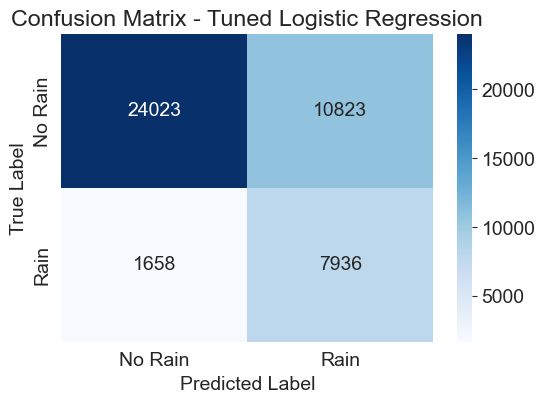

In [74]:
# Plot the confusion matrix as a heatmap
cfm = confusion_matrix(y_test, y_log_smt)
plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Apply SMOTE to balance the classes
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(x_train_sc, y_train)

# # Check class distribution after SMOTE
# print("After SMOTE:", Counter(y_train_resampled))

# # Initializing logistic classificiation model
# logistic_model_1 = LogisticRegression(max_iter = 1000, random_state = 42)

# #Training the model
# logistic_model_1.fit(X_train_resampled, y_train_resampled)

# #Making predictions on the test set
# y_pred_log_1 = logistic_model_1.predict(x_test_sc)

# #Evaluating the model
# accuracy_log = accuracy_score(y_test, y_pred_log_1)
# conf_matrix_log = confusion_matrix(y_test, y_pred_log_1)
# class_report_log = classification_report(y_test, y_pred_log_1)

# print("Accuracy:", accuracy_log)
# print("Classification Report:\n", class_report_log)
# print(confusion_matrix(y_test, y_pred_log_1))

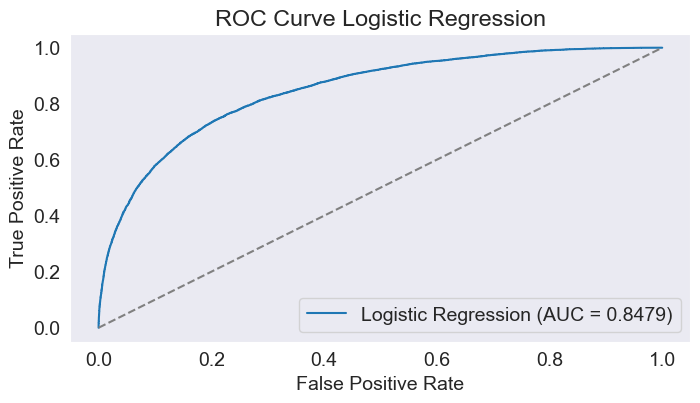

In [75]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_log_prob)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Random Forest

Accuracy Score: 0.8454


<Figure size 200x200 with 0 Axes>

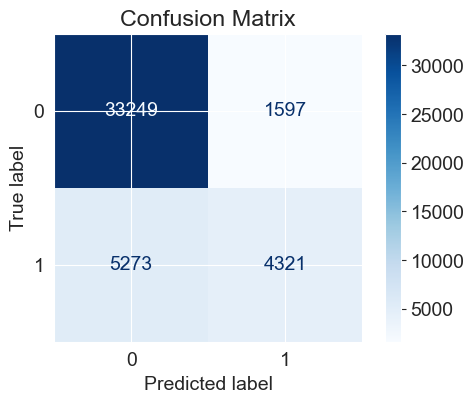

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     34846
           1       0.73      0.45      0.56      9594

    accuracy                           0.85     44440
   macro avg       0.80      0.70      0.73     44440
weighted avg       0.83      0.85      0.83     44440



In [76]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(x_train_sc, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test_sc)
y_proba = rf_classifier.predict_proba(x_test_sc)[:, 1]  # Probability scores for ROC-AUC
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Confusion Matrix
plt.figure(figsize=(2,2))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7814
ROC-AUC Score: 0.8542
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     34846
           1       0.50      0.76      0.60      9594

    accuracy                           0.78     44440
   macro avg       0.71      0.77      0.73     44440
weighted avg       0.83      0.78      0.80     44440



<Figure size 600x400 with 0 Axes>

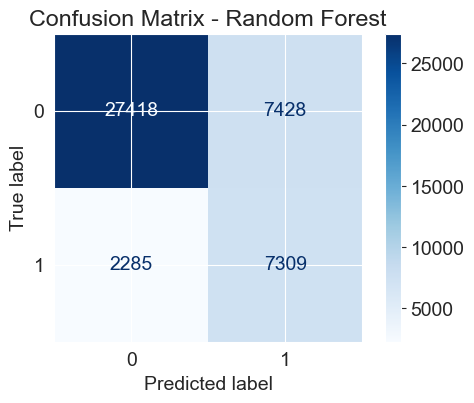

In [77]:
# Apply SMOTEENN to balance the classes
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(x_train_sc, y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_classifier.fit(X_resampled, y_resampled )

# Predict on the test data
y_pred = rf_classifier.predict(x_test_sc)
y_proba = rf_classifier.predict_proba(x_test_sc)[:, 1]

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


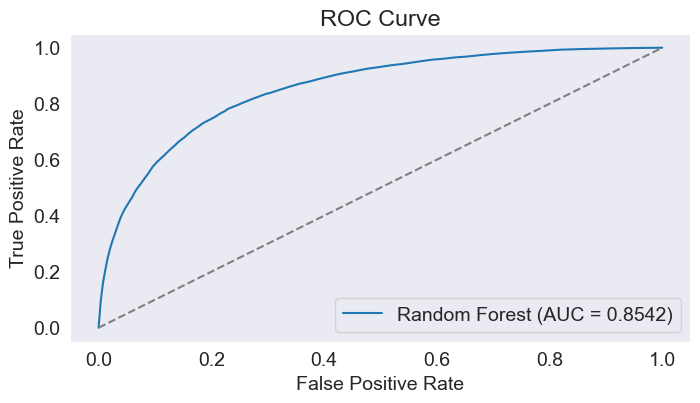

In [78]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Decision Tree

Accuracy Score (Decision Tree): 0.8280


<Figure size 200x200 with 0 Axes>

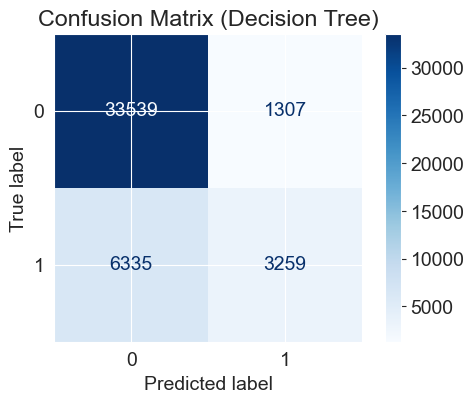

In [79]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3 ,random_state=42)

# Fit the model to the training data
dt_classifier.fit(x_train_sc, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(x_test_sc)
y_proba_dt = dt_classifier.predict_proba(x_test_sc)[:, 1]  # Probability scores for ROC-AUC

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score (Decision Tree): {accuracy_dt:.4f}")

# Confusion Matrix
plt.figure(figsize=(2,2))
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Decision Tree)")
plt.show()


##### balancing

In [81]:
# Apply SMOTEENN to balance the classes
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(x_train_sc, y_train)

# Fit the model to the training data
dt_classifier.fit(X_resampled, y_resampled )

# Predict on the test data
y_pred_dt = dt_classifier.predict(x_test_sc)
y_proba_dt = dt_classifier.predict_proba(x_test_sc)[:, 1]

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score: {accuracy:.4f}")
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Accuracy Score: 0.7179
ROC-AUC Score: 0.7873
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     34846
           1       0.41      0.74      0.53      9594

    accuracy                           0.72     44440
   macro avg       0.66      0.73      0.66     44440
weighted avg       0.80      0.72      0.74     44440

[[24784 10062]
 [ 2474  7120]]


<Figure size 800x800 with 0 Axes>

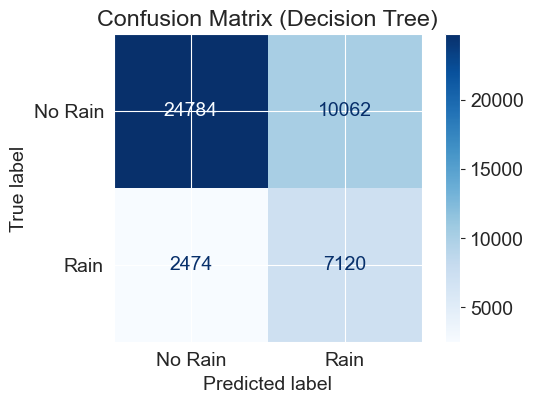

In [89]:
# Compute confusion matrix
plt.figure(figsize=(8,8))
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create display object and format numbers as integers
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No Rain", "Rain"])
disp_dt.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' ensures integer format

# Title and show
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

[Text(0.5, 0.875, 'Humidity3pm <= 0.312\ngini = 0.485\nsamples = 123539\nvalue = [51186, 72353]\nclass = Class 1'),
 Text(0.25, 0.625, 'WindGustSpeed <= 0.837\ngini = 0.411\nsamples = 60030\nvalue = [42657, 17373]\nclass = Class 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud3pm <= -0.018\ngini = 0.338\nsamples = 48152\nvalue = [37764, 10388]\nclass = Class 0'),
 Text(0.0625, 0.125, 'gini = 0.248\nsamples = 34803\nvalue = [29760, 5043]\nclass = Class 0'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 13349\nvalue = [8004.0, 5345.0]\nclass = Class 0'),
 Text(0.375, 0.375, 'Sunshine <= 0.578\ngini = 0.484\nsamples = 11878\nvalue = [4893.0, 6985.0]\nclass = Class 1'),
 Text(0.3125, 0.125, 'gini = 0.416\nsamples = 8783\nvalue = [2596, 6187]\nclass = Class 1'),
 Text(0.4375, 0.125, 'gini = 0.383\nsamples = 3095\nvalue = [2297, 798]\nclass = Class 0'),
 Text(0.75, 0.625, 'Cloud3pm <= -0.43\ngini = 0.233\nsamples = 63509\nvalue = [8529, 54980]\nclass = Class 1'),
 Text(0.625, 0.7

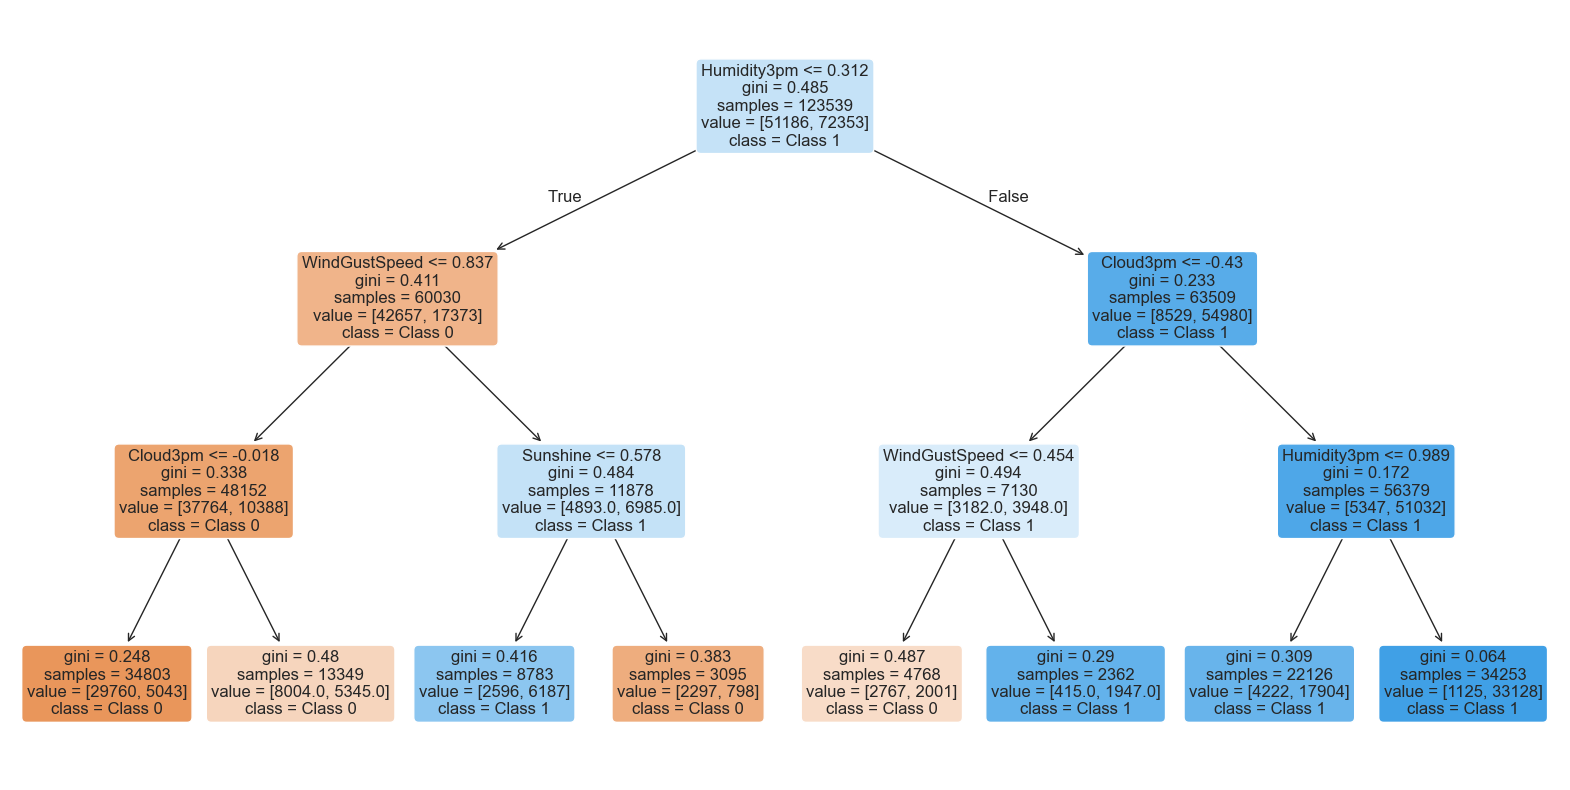

In [86]:
# Visualize the Decision Tree with depth = 3
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=x_train_sc.columns, 
          class_names=["Class 0", "Class 1"], 
          filled=True, 
          rounded=True, 
          fontsize=12)

## SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC

In [ ]:
# Initialize the SVM Classifier with probability=True to enable ROC-AUC calculation
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Fit the model to the training data
svm_classifier.fit(x_train_sc, y_train)

# Predict on the test data
y_pred_svm = svm_classifier.predict(x_test_sc)
y_proba_svm = svm_classifier.predict_proba(x_test_sc)[:, 1]  # Probability scores for ROC-AUC


In [ ]:
# Accuracy Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score (SVM): {accuracy_svm:.4f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (SVM)")
plt.show()

# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


In [ ]:
# ROC-AUC Score
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"ROC-AUC Score (SVM): {roc_auc_svm:.4f}")

# ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM)")
plt.legend(loc="lower right")
plt.grid()
plt.show()
